# 常用模块
- calendar
- time
- datetime
- timeit
- os
- shutil
- zip
- math
- string
- 上述所有模块理论上都应该先导入，但string是特例


In [1]:
#匿名函数 lambda
add = lambda a, b: a + b
print(add(10, 20))

30


In [2]:
# 匿名函数可作为函数的参数传递
def func(a, b, operation):
    print("a = %d"%a)
    print("b = %d"%b)
    print("result = ", operation(a, b))
func(10, 20, lambda a, b:a + b)
print("-" * 20)
func(10, 20, lambda a, b:a - b)

a = 10
b = 20
result =  30
--------------------
a = 10
b = 20
result =  -10


In [5]:
# 匿名函数还可作为内置函数的参数使用
students = [{"name":"张三","age":18},
           {"name":"李四","age":20},
           {"name":"王麻子","age":24}]
students.sort(key = lambda x: x["name"])
print("按姓名排序的结果为:",students)
students.sort(key = lambda x: x["age"])
print("按年龄排序的结果为:",students)

按姓名排序的结果为: [{'name': '张三', 'age': 18}, {'name': '李四', 'age': 20}, {'name': '王麻子', 'age': 24}]
按年龄排序的结果为: [{'name': '张三', 'age': 18}, {'name': '李四', 'age': 20}, {'name': '王麻子', 'age': 24}]


time模块
时间戳
- 一个时间表示，根据不同语言，可以是整数或者浮点数
- 是从1970年1月1日0时0分0秒到现在经历的秒数
- 如果表示的时间是1970年以前或者太遥远的未来，可能出现异常
- 32位操作系统能够支持到2038年
UTC时间
- UTC又称为世界协调时间，以英国的格林尼治天文所在地区的时间作为参考的时间，也叫做世界标准时间。
- 中国时间是 UTC+8 东八区
夏令时
- 夏令时就是在夏天的时候将时间调快一小时，本意是督促大家早睡早起节省蜡烛！ 每天变成25个小时，本质没变还是24小时
时间元组
- 一个包含时间内容的普通元组


    索引      内容    属性            值

    0       年       tm_year     2015
    1       月       tm_mon      1～12
    2       日       tm_mday     1～31
    3       时       tm_hour     0～23
    4       分       tm_min      0～59
    5       秒       tm_sec      0～61  60表示闰秒  61保留值
    6       周几     tm_wday     0～6
    7       第几天    tm_yday     1～366
    8       夏令时    tm_isdst    0，1，-1（表示夏令时）

In [13]:
import time
# 时间模块的属性
# timezone: 当前时区和UTC时间相差的秒数，在没有夏令时的情况下的间隔,东八区的是 -28800
# altzone  获取当前时区与UTC时间相差的秒数，在有夏令时的情况下，
# daylight 测当前是否是夏令时时间状态, 0 表示是
print(time.daylight)


0


In [16]:
# 时间函数, 获取时间戳
import time
ticks = time.time()
print("当前时间戳为:",ticks)

当前时间戳为: 1531152932.474374


In [19]:
# localtime， 得到当前时间的时间结构
# 可以通过点号操作符得到相应的属性元素的内容
t = time.localtime()
print(t)
print(t.tm_hour)

time.struct_time(tm_year=2018, tm_mon=7, tm_mday=10, tm_hour=0, tm_min=19, tm_sec=50, tm_wday=1, tm_yday=191, tm_isdst=0)
0


In [2]:
import time
#asctime() 返回元组的正常字符串化之后的时间格式 
# 格式：time.asctime（时间元组）
# 返回值:字符串 Tue Jun  6 11:11:00 2017
t = time.localtime()
print(t)
tt = time.asctime(t)
print(type(tt))
print(tt)

time.struct_time(tm_year=2019, tm_mon=9, tm_mday=7, tm_hour=13, tm_min=18, tm_sec=19, tm_wday=5, tm_yday=250, tm_isdst=0)
<class 'str'>
Sat Sep  7 13:18:19 2019


In [21]:
# ctime: 获取字符串化的当前时间
t = time.ctime()
print(type(t))
print(t)

<class 'str'>
Tue Jul 10 00:22:03 2018


In [ ]:
# mktime() 使用时间元组获取对应的时间戳
# 格式：time.mktime（时间元组）
# 返回值：浮点数时间戳

lt = time.localtime()
ts = time.mktime(lt)
print(type(ts))
print(ts)

In [22]:
# sleep: 使程序进入睡眠，n秒后继续

for i in range(10):
    print(i)
    time.sleep(1)

0
1
2
3
4
5
6
7
8
9


# strftime:将时间元组转化为自定义的字符串格式
'''
格式  含义  备注
%a  本地（locale）简化星期名称    
%A  本地完整星期名称    
%b  本地简化月份名称    
%B  本地完整月份名称    
%c  本地相应的日期和时间表示    
%d  一个月中的第几天（01 - 31）   
%H  一天中的第几个小时（24 小时制，00 - 23）   
%I  一天中的第几个小时（12 小时制，01 - 12）   
%j  一年中的第几天（001 - 366）  
%m  月份（01 - 12） 
%M  分钟数（00 - 59）    
%p  本地 am 或者 pm 的相应符    注1
%S  秒（01 - 61）注2
%U  一年中的星期数（00 - 53 星期天是一个星期的开始）第一个星期天之前的所有天数都放在第 0 周   注3
%w  一个星期中的第几天（0 - 6，0 是星期天） 注3
%W  和 %U 基本相同，不同的是 %W 以星期一为一个星期的开始  
%x  本地相应日期  
%X  本地相应时间  
%y  去掉世纪的年份（00 - 99）    
%Y  完整的年份   
%z  用 +HHMM 或 -HHMM 表示距离格林威治的时区偏移（H 代表十进制的小时数，M 代表十进制的分钟数）      
%%  %号本身

In [17]:
#%A 本地完整星期名称
#j 一年内的多少天
import time
print(time.localtime())
print(time.strftime("%Y-%m-%d %H:%M:%S %A %j",time.localtime()))

time.struct_time(tm_year=2018, tm_mon=6, tm_mday=28, tm_hour=21, tm_min=18, tm_sec=53, tm_wday=3, tm_yday=179, tm_isdst=0)
2018-06-28 21:18:53 Thursday 179 28


In [38]:
# 时间元组
import time
print(time.clock())
print(time.time())

139.89034373523455
1530192326.3364866


## calendar 日历模块

In [46]:
# 日历函数
# calendar ： 获取一年的日历字符串

# 参数
# w = 每个日期之间间隔的字符数
# l = 每周占用的行数
# c = 每月之间间隔的字符数

import calendar
calendar_febraray = calendar.month(2017, 1)
print(calendar_febraray)
caLendar_year = calendar.calendar(2017)
print(caLendar_year)

    January 2017
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30 31

                                  2017

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
                   1             1  2  3  4  5             1  2  3  4  5
 2  3  4  5  6  7  8       6  7  8  9 10 11 12       6  7  8  9 10 11 12
 9 10 11 12 13 14 15      13 14 15 16 17 18 19      13 14 15 16 17 18 19
16 17 18 19 20 21 22      20 21 22 23 24 25 26      20 21 22 23 24 25 26
23 24 25 26 27 28 29      27 28                     27 28 29 30 31
30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
                1  2       1  2  3  4  5  6  7                1  2  3  4
 3  4  5  6  7  8  9       8  9 10 11 12 13 14       5  6  7  8  9 10 11
10 11 12 13 14 15 16  

In [2]:
import calendar
# isleap 判断一年是否是闰年
calendar.isleap(2000)

True

In [4]:
# leapdays:获取制定年份之间的闰年个数
calendar.leapdays(2001,2018)

4

In [7]:
help(calendar.leapdays)

Help on function leapdays in module calendar:

leapdays(y1, y2)
    Return number of leap years in range [y1, y2).
    Assume y1 <= y2.



In [10]:
# monthrange（） 获取一个月的周几开始即和天数
# 格式：calendar.monthrange(年,月)
# 回值：元组(周几开始,总天数)
# 注意：周默认 0 -6 表示周一到周天
w,t = calendar.monthrange(2017, 3)
print(w)
print(t)

2
31


In [9]:
# month（） 获取某个月的日历字符串
# 格式:calendar.month(年，月)
# 回值：月日历的字符串
m3 = calendar.month(2018, 3)
print(m3)

     March 2018
Mo Tu We Th Fr Sa Su
          1  2  3  4
 5  6  7  8  9 10 11
12 13 14 15 16 17 18
19 20 21 22 23 24 25
26 27 28 29 30 31



In [ ]:
# monthcalendar() 返回一个月每天的矩阵列表
# 格式：calendar.monthcalendar(年，月)
# 回值：二级列表
# 注意：矩阵中没有天数用0表示
m = calendar.monthcalendar(2018, 3)
print(type(m))
print(m)

In [ ]:
# prcal: print calendar 直接打印日历
#calendar.prcal(2018)
help(calendar.prcal)

In [11]:
# prmonth() 直接打印整个月的日历
# 格式：calendar.prmonth(年，月)
# 返回值：无
calendar.prmonth(2018, 3)

     March 2018
Mo Tu We Th Fr Sa Su
          1  2  3  4
 5  6  7  8  9 10 11
12 13 14 15 16 17 18
19 20 21 22 23 24 25
26 27 28 29 30 31


In [ ]:
# weekday() 获取周几
# 格式:calendar.weekday(年，月，日)
# 返回值:周几对应的数字
calendar.weekday(2018, 3, 26)

In [111]:
# 随机函数
import random
# 返回0与1之间的随机浮点数
random_num = float("%.5f"%random.random())
print(type(random_num))
random_num2 = int(random_num * 100000)
print(random_num2)

<class 'float'>
13605


In [148]:
# 返回随机整数
import random
random_num = random.randint(0,99999)
print(random_num)

31512


In [169]:
# 返回制定递增基数集合中的一个随机数
import random
random_num = random.randrange(0,100,10)
print(random_num)

20


In [186]:
# 返回集合一个随机元素，可以是列表、元组或字符串
import random
num_list = [56,89,44,2,45,69,54,8,24]
str1 = "qwqlkooe"
random_num = random.choice(num_list)
random_str = random.choice(str1)
print(random_num)
print(random_str)

45
o


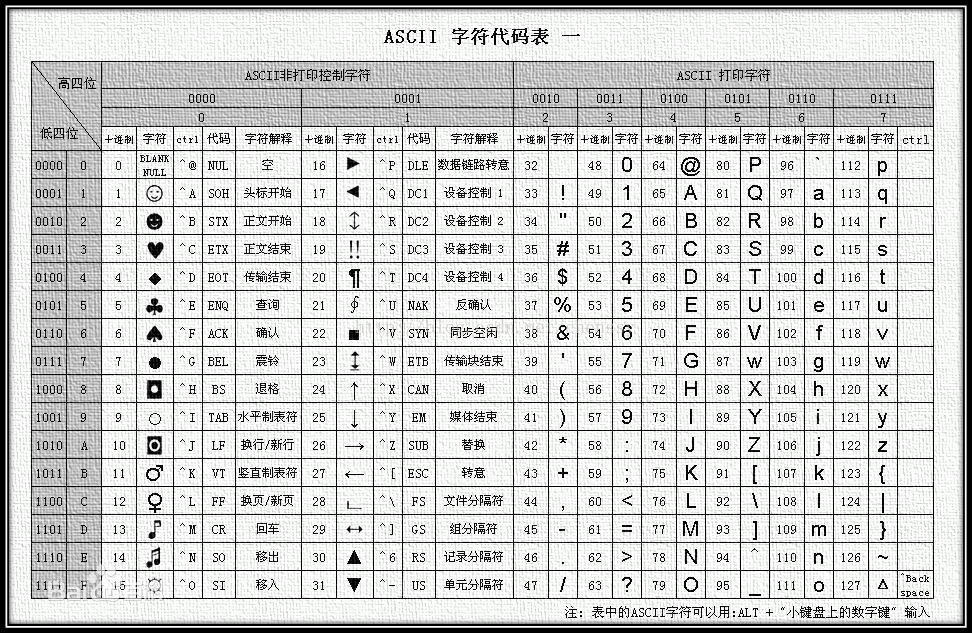